# Single Regression

In [84]:
import pandas as pd
import numpy as np
import os

In [85]:
data_path = os.path.join(os.path.pardir,'data','raw')
csv_path = os.path.join(data_path,'regression','linear')
nasdaqFile = os.path.join(csv_path,'NASDAQ.csv')
spFile = os.path.join(csv_path,'SP_500.csv')
googFile = os.path.join(csv_path,'GOOG.csv')
oilFile = os.path.join(csv_path,'USO.csv')
xomFile = os.path.join(csv_path,'XOM.csv')

In [86]:
def readFile(filename):
    data = pd.read_csv(filename, sep=",", usecols=[0,5], names=['Date','Price'], header=0)
    data.dropna(inplace=True)
    data.reset_index(drop=True, inplace=True)
    data.set_index('Date', drop=False, inplace=True)
    data.sort_index(ascending=False, inplace=True)
    returns = np.array(data['Price'][:-1],np.float)/np.array(data['Price'][1:],np.float)-1
    data['Returns'] = np.append(returns,np.nan)
    return data

In [87]:
goog_data = readFile(googFile)
# oil_data = readFile(oilFile)
# xom_data = readFile(xomFile)
# sp_data = readFile(spFile)
nasdaq_data = readFile(nasdaqFile)

In [88]:
# print(goog_data[goog_data.isnull().any(axis=1)])
# print(oil_data[oil_data.isnull().any(axis=1)])
# print(xom_data[xom_data.isnull().any(axis=1)])
# print(sp_data[sp_data.isnull().any(axis=1)])
# print(nasdaq_data[nasdaq_data.isnull().any(axis=1)])

In [93]:
print(goog_data.info())
print(oil_data.info())
print(xom_data.info())
print(sp_data.info())
print(nasdaq_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 155 entries, 2018-10-05 to 2006-01-01
Data columns (total 3 columns):
Date       155 non-null object
Price      155 non-null float64
Returns    154 non-null float64
dtypes: float64(2), object(1)
memory usage: 4.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 2 columns):
Date     152 non-null object
Price    152 non-null float64
dtypes: float64(1), object(1)
memory usage: 2.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 2 columns):
Date     155 non-null object
Price    155 non-null float64
dtypes: float64(1), object(1)
memory usage: 2.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 2 columns):
Date     155 non-null object
Price    155 non-null float64
dtypes: float64(1), object(1)
memory usage: 2.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 155 entries, 2018-10-05 to 2

In [90]:
# goog_data.dropna(inplace=True)
# goog_data.reset_index(drop=True, inplace=True)
# oil_data.dropna(inplace=True)
# oil_data.reset_index(drop=True, inplace=True)
# xom_data.dropna(inplace=True)
# xom_data.reset_index(drop=True, inplace=True)
# sp_data.dropna(inplace=True)
# sp_data.reset_index(drop=True, inplace=True)
# nasdaq_data.dropna(inplace=True)
# nasdaq_data.reset_index(drop=True, inplace=True)

In [91]:
goog_data.head()

,Date,Price,Returns
Date,,,
2018-10-05,2018-10-05,1157.349976,0.000000
2018-10-01,2018-10-01,1157.349976,-0.030265
2018-09-01,2018-09-01,1193.469971,-0.020292
2018-08-01,2018-08-01,1218.189941,0.000764
2018-07-01,2018-07-01,1217.260010,0.091077


In [92]:
nasdaq_data.head()

,Date,Price,Returns
Date,,,
2018-10-05,2018-10-05,7788.446777,-4.388550e-07
2018-10-01,2018-10-01,7788.450195,-3.205179e-02
2018-09-01,2018-09-01,8046.350098,-7.792050e-03
2018-08-01,2018-08-01,8109.540039,5.705970e-02
2018-07-01,2018-07-01,7671.790039,2.150250e-02


In [95]:
xData = nasdaq_data['Returns'][0:-1].values.reshape(-1,1) # will transform from one array into array of arrays with each element as an array
yData = goog_data['Returns'][0:-1]

In [96]:
xData

array([[-4.38854960e-07],
       [-3.20517874e-02],
       [-7.79204994e-03],
       [ 5.70596950e-02],
       [ 2.15025017e-02],
       [ 9.16132593e-03],
       [ 5.31893200e-02],
       [ 3.99213546e-04],
       [-2.88133218e-02],
       [-1.86832069e-02],
       [ 7.36000476e-02],
       [ 4.27990246e-03],
       [ 2.17460569e-02],
       [ 3.56698567e-02],
       [ 1.04687141e-02],
       [ 1.26872267e-02],
       [ 3.38250800e-02],
       [-9.37322100e-03],
       [ 2.49536859e-02],
       [ 2.29830175e-02],
       [ 1.48143821e-02],
       [ 3.75169687e-02],
       [ 3.12774431e-02],
       [ 2.26947938e-02],
       [ 2.59272318e-02],
       [-2.31287393e-02],
       [ 1.89479402e-02],
       [ 9.89714191e-03],
       [ 6.59677339e-02],
       [-2.12972559e-02],
       [ 3.61627075e-02],
       [-1.94031096e-02],
       [ 6.84298620e-02],
       [-1.21371054e-02],
       [-7.85755408e-02],
       [-1.98211604e-02],
       [ 1.08671624e-02],
       [ 9.38473623e-02],
       [-4.0

In [97]:
yData

Date
2018-10-05    0.000000
2018-10-01   -0.030265
2018-09-01   -0.020292
2018-08-01    0.000764
2018-07-01    0.091077
2018-06-01    0.028258
2018-05-01    0.066507
2018-04-01   -0.014015
2018-03-01   -0.066025
2018-02-01   -0.055738
2018-01-01    0.118062
2017-12-01    0.024466
2017-11-01    0.004692
2017-10-01    0.059983
2017-09-01    0.021058
2017-08-01    0.009490
2017-07-01    0.023957
2017-06-01   -0.058174
2017-05-01    0.065014
2017-04-01    0.092097
2017-03-01    0.007714
2017-02-01    0.033158
2017-01-01    0.032352
2016-12-01    0.018178
2016-11-01   -0.033778
2016-10-01    0.009327
2016-09-01    0.013350
2016-08-01   -0.002263
2016-07-01    0.110808
2016-06-01   -0.059289
                ...   
2008-07-01   -0.100053
2008-06-01   -0.101366
2008-05-01    0.020042
2008-04-01    0.303812
2008-03-01   -0.065177
2008-02-01   -0.165019
2008-01-01   -0.183924
2007-12-01   -0.002193
2007-11-01   -0.019802
2007-10-01    0.246320
2007-09-01    0.100961
2007-08-01    0.010294
2007-0

In [98]:
from sklearn import datasets, linear_model

In [99]:
goodGoogModel = linear_model.LinearRegression()

In [100]:
goodGoogModel.fit(xData,yData)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [101]:
goodGoogModel.score(xData,yData)

0.39350743527930687

In [103]:
print(goodGoogModel.coef_) # slope
print(goodGoogModel.intercept_)

[1.07670174]
0.004434916383914774


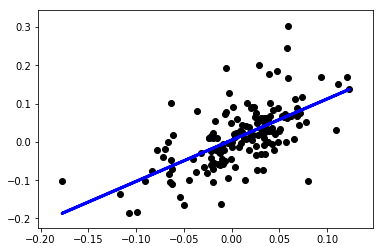

In [107]:
import matplotlib.pyplot as plt
plt.scatter(xData, yData, color='black')
plt.plot(xData, goodGoogModel.predict(xData), color='blue', linewidth=3)
# plt.xticks(())
# plt.yticks(())
plt.show()